# Week 7

In [2]:
# 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
# 2: Load the dataset (Make sure Week7_train.csv is in the working directory)
df = pd.read_csv("Week7_train.csv")

In [4]:
# Step 3: Check the shape of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (42000, 785)


In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y=df.iloc[0, :1]
x=df.iloc[0, 1:]

(784,)

In [19]:
x.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

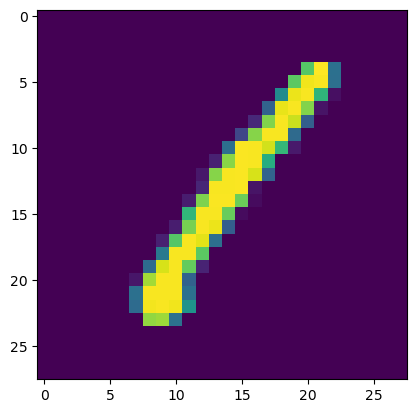

In [48]:
plt.imshow(x.values.reshape(28,28))

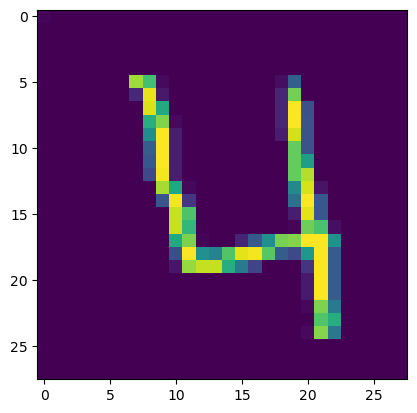

In [31]:
plt.imshow(df.iloc[3,:-1].values.reshape(28,28))

4


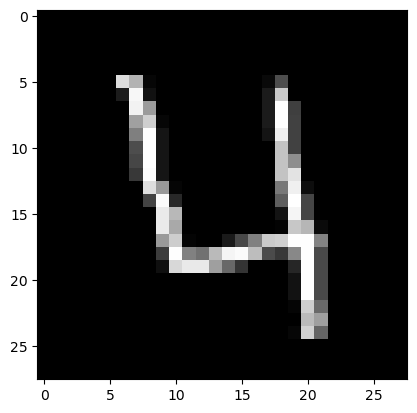

In [41]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28), cmap='gray')
print(df.iloc[3,0])

In [42]:
# 4: Select only 10% of the data from experiment. we will not use total data as KNN is
dfs = df.sample(frac=0.10)

In [43]:
# 5: Print the shape of the selected dataset
print("Shape of the selected dataset:", dfs.shape)

Shape of the selected dataset: (4200, 785)


In [71]:
# 6: Display the first 5 rows of the dataset
dfs.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17905,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18965,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21639,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39773,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y=dfs.iloc[1, :1]
x=dfs.iloc[1, 1:]

In [97]:
x.values.shape

(784,)

In [98]:
x.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

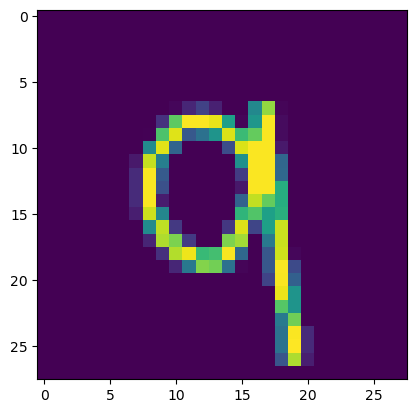

In [99]:
plt.imshow(x.values.reshape(28,28))

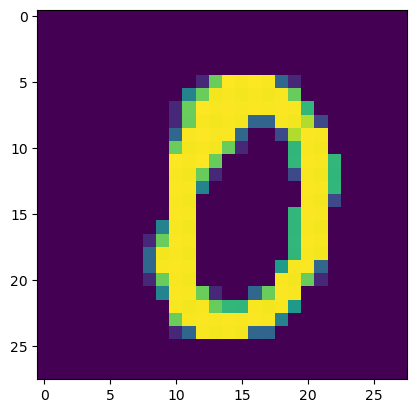

In [54]:
plt.imshow(dfs.iloc[3,:-1].values.reshape(28,28))

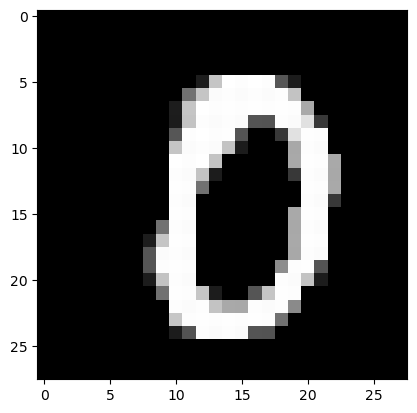

In [75]:
plt.imshow(dfs.iloc[3,:-1].values.reshape(28,28),cmap="gray")

In [60]:
# 7: Find the number of unique class labels
num_classes = dfs.iloc[:, -1].nunique()
print("Number of unique class labels:", num_classes)

Number of unique class labels: 1


In [66]:
# 8: Print the number of examples for each class label
print("Class distribution:\n", dfs.iloc[:, -1].value_counts())

Class distribution:
 pixel783
0    4200
Name: count, dtype: int64


In [77]:
# 9: Prepare X (features) and Y (labels)
X = dfs.iloc[:, :-1].values 
Y = dfs.iloc[:, -1].values 


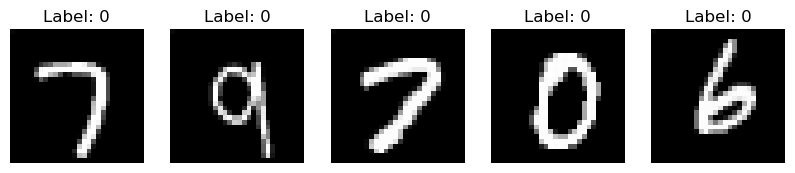

In [81]:
# 10: Visualize the first 5 images in X along with class labels (assuming image data)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {Y[i]}")
    axes[i].axis('off')
plt.show()

In [82]:
# 11: Split data into 75% training and 25% validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [83]:

# 12: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [84]:

# 13: Predict on validation set
Y_pred = knn.predict(X_test)

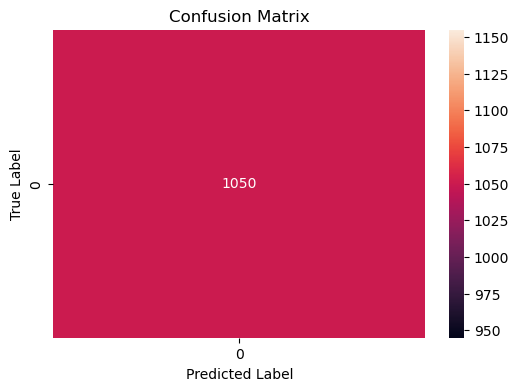

In [103]:
# 14: Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [86]:

# 15: Print classification report and accuracy
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050



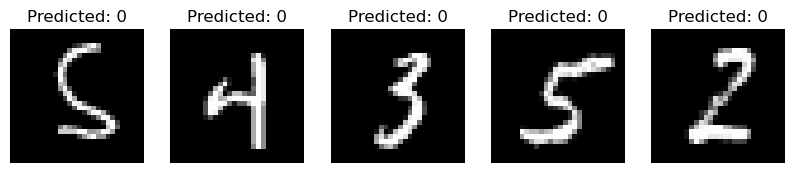

In [105]:

# 16: Visualize the first 5 digits in X_test and their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')  # Assuming 8x8 images
    axes[i].set_title(f"Predicted: {Y_pred[i]}")
    axes[i].axis('off')
plt.show()